# ScanEat Model: BMI

## Instalation 

In [3]:
# Instalation: pandas, numpy, tensorflow, matplotlib, scikit-learn, jupyter

# Basic Imports 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from tabulate import tabulate

# Machine Learning Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

## User Data Preprocessing

In [19]:
# Loading Dataset 

file_path = r"D:\2024_09_MSIB Bangkit\scaneat\bmi.csv"
user_data = pd.read_csv(file_path)

user_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
# Creating BMI as a Continuous Value, counted using formula (weight/(height)**2)

user_data['Height_m'] = user_data['Height']/ 100 # converting height from cm to meters
user_data['Gender'] = user_data['Gender'].map({'Male' : 1, 'Female': 0}) # Map Gender column to binary values:'Male: 1', 'Female: 0'
user_data['BMI'] = user_data['Weight'] / (user_data['Height_m']**2)


user_data.head()

,Gender,Height,Weight,Index,Height_m,BMI
0,1,174,96,4,1.74,31.708284
1,1,189,87,2,1.89,24.355421
2,0,185,110,4,1.85,32.140248
3,0,195,104,3,1.95,27.350427
4,1,149,61,3,1.49,27.476240


## Generating Model for BMI Prediction

### Defining Features 

In [21]:
# Defining Features 

X = user_data[["Gender", "Height", "Weight"]].values
y = user_data['BMI'].values

# Split the data into training, validation, and testing sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the input features 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Defining The Neural Network 


In [22]:
# Definining The Neural Network Model 

model_BMI = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1)
])

model_BMI.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training The Model 

In [23]:
# Train The Model 

history_BMI = model_BMI.fit(
    X_train, y_train, 
    validation_data = (X_val, y_val),
    epochs = 50, 
    batch_size=32, 
    verbose=1
)

# Evaluate the model on the test set 

test_loss, test_mae = model_BMI.evaluate(X_test, y_test, verbose=1)

# Make a prediction on the test 

y_pred = model_BMI.predict(X_test)

# Display test MAE and the first few prediction 

print("Test MAE:", test_mae)
print("Predictions:", y_pred.flatten())

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1594.5175 - mae: 37.6213 - val_loss: 1690.0181 - val_mae: 38.1560
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1615.6051 - mae: 37.6795 - val_loss: 1657.0585 - val_mae: 37.7503
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1434.8353 - mae: 35.5981 - val_loss: 1617.2230 - val_mae: 37.2508
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1401.0150 - mae: 35.0850 - val_loss: 1565.5377 - val_mae: 36.5984
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1481.1998 - mae: 36.1586 - val_loss: 1497.5195 - val_mae: 35.7303
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1374.7599 - mae: 34.5249 - val_loss: 1412.7653 - val_mae: 34.6200
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1223.9167 - mae: 32.5234 - val_loss: 1307.6385 - val_mae: 33.2021
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1170.0460 - mae: 31.3891 - val_loss: 1181.4749 - val_mae: 31.4317
Epoch 9

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001DE4ED24D60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Test MAE: 1.8516662120819092
Predictions: [29.813753 25.665031 48.13066  22.9476   53.73397  56.831818 18.21315
 24.745144 19.847294 23.220036 27.70633  19.844128 46.30175  62.99064
 56.826355 25.362865 24.640396 19.635036 23.301744 66.12191  25.543343
 28.18993  67.83143  29.886047 23.564804 45.241226 38.11743  31.249554
 28.2556   37.322258 19.534164 27.361946 21.52629  48.62168  32.929893
 40.06494  33.13785  72.31658  40.291496 35.392265 48.619305 51.069107
 26.532497 69.54362  31.799513 27.2141   42.807373 20.688349 49.993446
 62.986034 45.52376  27.556377 26.5281   35.913322 31.502365 33.373154
 42.094223 46.55786  49.325462 40.461143 48.879467 34.12133  56.975044
 34.02853  59.97517  22.160122 24.251518 59.75538  29.833244 45.908073
 31.000393 35.97304  65.57781  36.86313  40.016766]


### Visualizing Training Data

In [24]:
# Checking the Actual BMI and the model counted BMI 

y_pred = y_pred.flatten()

comparison_BMI = pd.DataFrame({
    'Actual BMI': y_test, 
    'Predicted BMI': y_pred
})

# Error (Difference): 

comparison_BMI['Error'] = comparison_BMI['Actual BMI'] - comparison_BMI['Predicted BMI']
print(comparison_BMI.head())
comparison_BMI.to_csv('BMI_comparison.csv', index=False)

   Actual BMI  Predicted BMI     Error
0   30.407627      29.813753  0.593873
1   28.010412      25.665031  2.345381
2   48.789642      48.130661  0.658981
3   24.857955      22.947599  1.910355
4   52.437642      53.733971 -1.296329


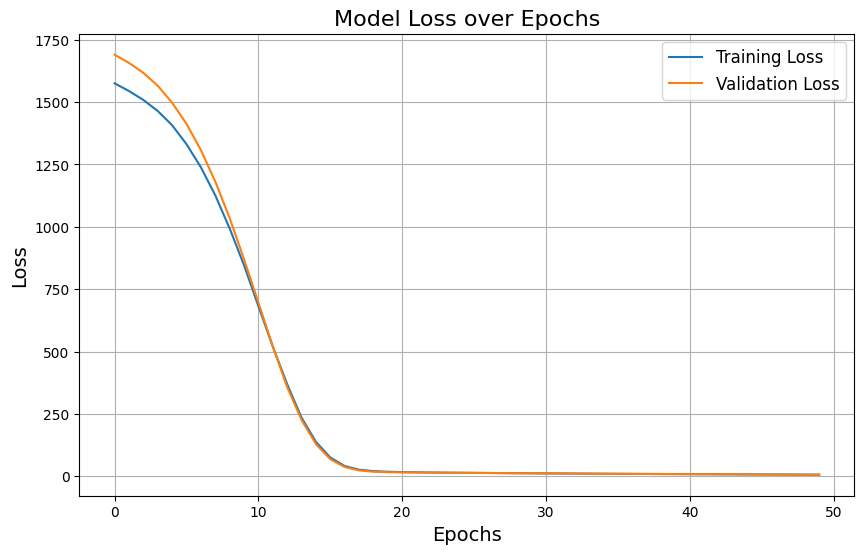

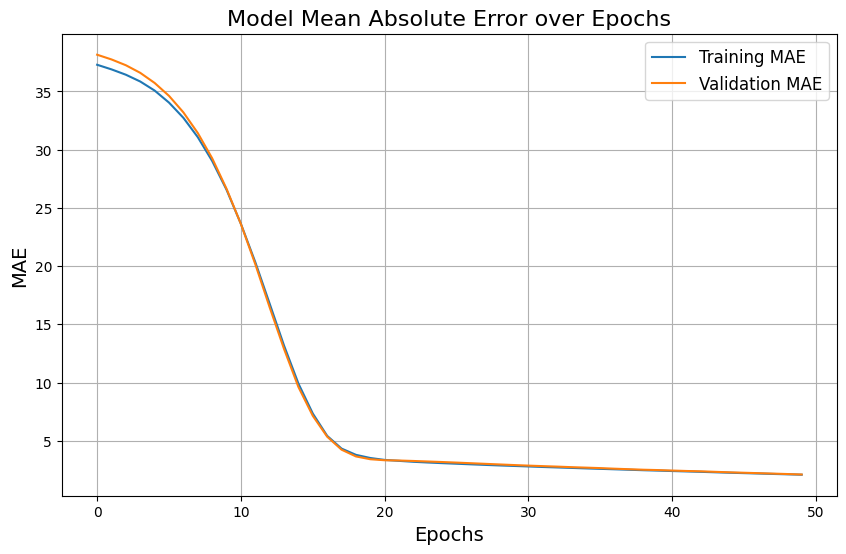

In [25]:
# Visualize data 

# Assuming 'history' is the object returned by model.fit()
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_BMI.history['loss'], label='Training Loss')
plt.plot(history_BMI.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot training and validation MAE (if included in metrics)
if 'mae' in history_BMI.history and 'val_mae' in history_BMI.history:
    plt.figure(figsize=(10, 6))
    plt.plot(history_BMI.history['mae'], label='Training MAE')
    plt.plot(history_BMI.history['val_mae'], label='Validation MAE')
    plt.title('Model Mean Absolute Error over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('MAE', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


### Saving The Model 

In [26]:
# Saving the Model 

model_BMI.save('BMI_Model.h5')

## Adding New Information after applying the Model BMI

In [27]:
# Getting Status for the BMI 

def get_BMI_status(y_pred): 
    if y_pred < 18.5: 
        return "Underweight" 
    elif 18.5 <= y_pred < 24.9: 
        return "Healthy Weight"
    elif 25 <= y_pred < 29.9: 
        return "Overweight"
    elif 30 <= y_pred < 34.9: 
        return "Class 1 Obesity"
    elif 35 <= y_pred < 39.9: 
        return "Class 2 Obesity"
    else: 
        return "Class 3 Obesity"

In [28]:
# Getting theh full user data

user_data['Sex'] = user_data["Gender"]
user_data['Height'] = user_data["Height_m"]
user_data['Weight'] = user_data["Weight"]
user_data['Actual BMI'] = comparison_BMI['Actual BMI']
user_data['Predicted BMI'] = comparison_BMI['Predicted BMI']
user_data['BMI Status'] = comparison_BMI['Predicted BMI'].apply(get_BMI_status)

columns_to_display = ['Gender', 'Height', 'Weight', 'Actual BMI', 'Predicted BMI', 'BMI Status']
compiled_user_data = user_data[columns_to_display]
print(compiled_user_data.head())

# with open("all_users_data.md", "w") as file: 
    #file.write(markdown_table)
    
# print("Markdown file saved as 'all_users data.md")


   Gender  Height  Weight  Actual BMI  Predicted BMI       BMI Status
0       1    1.74      96   30.407627      29.813753       Overweight
1       1    1.89      87   28.010412      25.665031       Overweight
2       0    1.85     110   48.789642      48.130661  Class 3 Obesity
3       0    1.95     104   24.857955      22.947599   Healthy Weight
4       1    1.49      61   52.437642      53.733971  Class 3 Obesity


In [29]:
# Save to markdown file
with open("compiled_user_data.md", "w") as file:
    file.write(compiled_user_data.to_markdown(index=False))

print("Compiled user data saved to 'compiled_user_data.md'")


Compiled user data saved to 'compiled_user_data.md'


## Generating Model for Daily Nutritional Intake Value

## Dataset Preprocessing

In [41]:
# Loading Dataset 

file_path_nutr = r"D:\2024_09_MSIB Bangkit\scaneat\nutritional intake.csv"
nutr_data = pd.read_csv(file_path_nutr)
nutr_data['Sex'] = nutr_data['gender'].map({'Male' : 1, 'Female': 0,}).astype(float)  # Map Gender column to binary values:'Male: 1', 'Female: 0'

nutr_data.head()

,gender,age,bmi,Sex
0,Female,80.0,25.19,0.0
1,Female,54.0,27.32,0.0
2,Male,28.0,27.32,1.0
3,Female,36.0,23.45,0.0
4,Male,76.0,20.14,1.0


#### Counting Total Calories Intake 

In [45]:
import pandas as pd

# Load dataset
file_path_nutr = r"D:\2024_09_MSIB Bangkit\scaneat\nutritional intake.csv"
nutr_data = pd.read_csv(file_path_nutr)

# Map Gender column to binary values ('Male': 1, 'Female': 0)
nutr_data['Sex'] = nutr_data['gender'].map({'Male': 1, 'Female': 0}).astype(float)

# Function to calculate total calories
def total_calories(row): 
    base_sex = row['Sex']
    base_age = row['age']

    if base_sex == 1.0 and base_age in range(10, 13): 
        return 2000
    elif base_sex == 1.0 and base_age in range(13, 16): 
        return 2400
    elif base_sex == 1.0 and base_age in range(16, 19): 
        return 2650
    elif base_sex == 1.0 and base_age in range(19, 30): 
        return 2650
    elif base_sex == 1.0 and base_age in range(29, 50): 
        return 2550
    elif base_sex == 1.0 and base_age in range(50, 65): 
        return 2150
    elif base_sex == 1.0 and base_age in range(65, 80): 
        return 1800
    elif base_sex == 1.0 and base_age >= 80: 
        return 1600
    elif base_sex == 0.0 and base_age in range(10, 13): 
        return 1900
    elif base_sex == 0.0 and base_age in range(13, 16): 
        return 2050
    elif base_sex == 0.0 and base_age in range(16, 19): 
        return 2100
    elif base_sex == 0.0 and base_age in range(19, 30): 
        return 2250
    elif base_sex == 0.0 and base_age in range(29, 50): 
        return 2150
    elif base_sex == 0.0 and base_age in range(50, 65): 
        return 1800
    elif base_sex == 0.0 and base_age in range(65, 80): 
        return 1550
    elif base_sex == 0.0 and base_age >= 80: 
        return 1400
    return None

# Apply the function row-wise
nutr_data['Total Energy (kkal)'] = nutr_data.apply(total_calories, axis=1)

# Display the updated DataFrame
print(nutr_data.head())


   gender   age    bmi  Sex  Total Energy (kkal)
0  Female  80.0  25.19  0.0               1400.0
1  Female  54.0  27.32  0.0               1800.0
2    Male  28.0  27.32  1.0               2650.0
3  Female  36.0  23.45  0.0               2150.0
4    Male  76.0  20.14  1.0               1800.0


#### Counting Total Fat Intake 

In [46]:
# Defining The FFS Intake 

def total_fat(row): 
    base_sex = row['Sex']
    base_age = row['age']

    if base_sex == 1.0 and base_age in range(10, 13): 
        return 65
    elif base_sex == 1.0 and base_age in range(13, 16): 
        return 80
    elif base_sex == 1.0 and base_age in range(16, 19): 
        return 85
    elif base_sex == 1.0 and base_age in range(19, 30): 
        return 75
    elif base_sex == 1.0 and base_age in range(29, 50): 
        return 70
    elif base_sex == 1.0 and base_age in range(50, 65): 
        return 60
    elif base_sex == 1.0 and base_age in range(65, 80): 
        return 50
    elif base_sex == 1.0 and base_age >= 80: 
        return 45
    elif base_sex == 0.0 and base_age in range(10, 13): 
        return 65
    elif base_sex == 0.0 and base_age in range(13, 16): 
        return 70
    elif base_sex == 0.0 and base_age in range(16, 19): 
        return 70
    elif base_sex == 0.0 and base_age in range(19, 30): 
        return 65
    elif base_sex == 0.0 and base_age in range(29, 50): 
        return 60
    elif base_sex == 0.0 and base_age in range(50, 65): 
        return 60
    elif base_sex == 0.0 and base_age in range(65, 80): 
        return 58
    elif base_sex == 0.0 and base_age >= 80: 
        return 58
    return None

# Apply the function row-wise
nutr_data['Total Fat (g)'] = nutr_data.apply(total_fat, axis=1)

# Display the updated DataFrame
print(nutr_data.head())

   gender   age    bmi  Sex  Total Energy (kkal)  Total Fat (g)
0  Female  80.0  25.19  0.0               1400.0           58.0
1  Female  54.0  27.32  0.0               1800.0           60.0
2    Male  28.0  27.32  1.0               2650.0           75.0
3  Female  36.0  23.45  0.0               2150.0           60.0
4    Male  76.0  20.14  1.0               1800.0           50.0


#### Counting Total Sodium Intake

In [47]:
def total_sodium(row): 
    base_sex = row['Sex']
    base_age = row['age']

    if base_sex == 1.0 and base_age in range(10, 13): 
        return 1300
    elif base_sex == 1.0 and base_age in range(13, 16): 
        return 1500
    elif base_sex == 1.0 and base_age in range(16, 19): 
        return 1700
    elif base_sex == 1.0 and base_age in range(19, 30): 
        return 1500
    elif base_sex == 1.0 and base_age in range(29, 50): 
        return 1300
    elif base_sex == 1.0 and base_age in range(50, 65): 
        return 1100
    elif base_sex == 1.0 and base_age in range(65, 80): 
        return 1100
    elif base_sex == 1.0 and base_age >= 80: 
        return 1000
    elif base_sex == 0.0 and base_age in range(10, 13): 
        return 1400
    elif base_sex == 0.0 and base_age in range(13, 16): 
        return 1500
    elif base_sex == 0.0 and base_age in range(16, 19): 
        return 1600
    elif base_sex == 0.0 and base_age in range(19, 30): 
        return 1500
    elif base_sex == 0.0 and base_age in range(29, 50): 
        return 1500
    elif base_sex == 0.0 and base_age in range(50, 65): 
        return 1400
    elif base_sex == 0.0 and base_age in range(65, 80): 
        return 1200
    elif base_sex == 0.0 and base_age >= 80: 
        return 1000
    return None

# Apply the function row-wise
nutr_data['Total Sodium (mg)'] = nutr_data.apply(total_sodium, axis=1)

# Display the updated DataFrame
print(nutr_data.head())

   gender   age    bmi  Sex  Total Energy (kkal)  Total Fat (g)  \
0  Female  80.0  25.19  0.0               1400.0           58.0   
1  Female  54.0  27.32  0.0               1800.0           60.0   
2    Male  28.0  27.32  1.0               2650.0           75.0   
3  Female  36.0  23.45  0.0               2150.0           60.0   
4    Male  76.0  20.14  1.0               1800.0           50.0   

   Total Sodium (mg)  
0             1000.0  
1             1400.0  
2             1500.0  
3             1500.0  
4             1100.0  


#### Counting Total Sugar Intake

In [49]:
# Calculate total sugar intake in grams
def calculate_sugar_intake(row):
    total_calories = row['Total Energy (kkal)']  
    sugar_kcal = total_calories * 0.10  # 10% of total calorie intake
    sugar_grams = sugar_kcal / 4  # Convert kcal to grams (1 g sugar = 4 kcal)
    return sugar_grams

# Apply the function to calculate sugar intake
nutr_data['Total Sugar (g)'] = nutr_data.apply(calculate_sugar_intake, axis=1)

# Display the updated DataFrame
print(nutr_data.head())


   gender   age    bmi  Sex  Total Energy (kkal)  Total Fat (g)  \
0  Female  80.0  25.19  0.0               1400.0           58.0   
1  Female  54.0  27.32  0.0               1800.0           60.0   
2    Male  28.0  27.32  1.0               2650.0           75.0   
3  Female  36.0  23.45  0.0               2150.0           60.0   
4    Male  76.0  20.14  1.0               1800.0           50.0   

   Total Sodium (mg)  Total Sugar (g)  
0             1000.0            35.00  
1             1400.0            45.00  
2             1500.0            66.25  
3             1500.0            53.75  
4             1100.0            45.00  


## Generating Model for Daily Nutrition Intake Prediction 


### Model Daily Calories

In [ ]:
# Definining The Neural Network Model 

model_kcal = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1)
])

model_kcal.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train The Model 

history_cal = model_BMI.fit(
    X_train, y_train, 
    validation_data = (X_val, y_val),
    epochs = 50, 
    batch_size=32, 
    verbose=1
)

# Evaluate the model on the test set 

test_loss, test_mae = model_BMI.evaluate(X_test, y_test, verbose=1)

# Make a prediction on the test 

y_pred = model_BMI.predict(X_test)

# Display test MAE and the first few prediction 

print("Test MAE:", test_mae)
print("Predictions:", y_pred.flatten())

In [1]:
# Prediction function for BMI
from tensorflow.keras.models import load_model
import joblib
import numpy as np

def predict_bmi(input_data, model_path, scaler_path):
    """
    Predicts BMI using the trained BMI model.

    Parameters:
    - input_data: A numpy array of shape (n_samples, 3), where the columns represent [Gender, Height (cm), Weight (kg)].
    - model_path: Path to the saved model file (e.g., 'model_BMI.h5').
    - scaler_path: Path to the saved scaler file (e.g., 'scaler_BMI.pkl').

    Returns:
    - bmi_predictions: Predicted BMI values as a numpy array.
    """
    # Load the trained BMI model
    bmi_model = load_model(model_path)
    
    # Load the scaler
    scaler = joblib.load(scaler_path)
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)
    
    # Predict BMI
    bmi_predictions = bmi_model.predict(input_data_scaled).flatten()
    
    return bmi_predictions




In [ ]:
# Example usage
if __name__ == "__main__":
    # Example input: [Gender (1=Male, 0=Female), Height (cm), Weight (kg)]
    example_data = np.array([[1, 180, 75]])
    
    # Paths to your saved model and scaler
    model_path = r"D:\2024_09_MSIB Bangkit\scaneat\BMI_Model.h5"
    scaler_path = "path/to/your/scaler_BMI.pkl"

    # Make predictions
    bmi_prediction = predict_bmi(example_data, model_path, scaler_path)
    print(f"Predicted BMI: {bmi_prediction[0]}")